In [85]:
consumer_key = 'iFHlvlm9YIlSoJ5KroqmOPjXg1'
consumer_secret = 'WNET5masMtraDxvz5Pqa2DW9PkIVyDIwY8h2khssdqXHIGAbui1'
access_token = '2810778774-NqaiMZTTTgZRJGpPuOj2P6VcRDLGozWikynMqGR1'
access_secret = 'aE8s67bCpzQi9A9tyRWqTBm7sls8PUsASVdU0SkZSEBgB1'

In [86]:
import tweepy
import pandas as pd

In [87]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth)

In [88]:
cursor = tweepy.Cursor(api.user_timeline,id='realDonaldTrFan',tweet_mode='extended').items(1)
for i in cursor:
    print(dir(i))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'truncated', 'user']


In [89]:
cursor = tweepy.Cursor(api.user_timeline,id='realDonaldTrFan',tweet_mode='extended').items(1)
for i in cursor:
    print(i.full_text)

HA! I found a SECRET way to Tweat even though Twitter tried to ban ME! BTW – All my followers who violently stormed MY Capitol need to report it to MY FBI ASAP!! Did someone say PARDONS?! Just call 1-800-225-5324. AND send your Capitol selfies &amp; videos to https://t.co/n9bXkRGaVL


In [127]:
# Query
cursor = tweepy.Cursor(api.search,q='Nepal',tweet_mode='extended').items(2)
for i in cursor:
    print(i.full_text)

RT @TibetReliefFund: Why sponsorship matters 

Tibet Relief Fund works with ten agencies across India and Nepal to sponsor Tibetans in need…
RT @SeetuDass: #কবীৰপৰমেশ্বৰ_চাৰিওযুগত_আহে
কবীৰ চাহাব ত্ৰেতা যুগত মুনীন্দ্ৰ নামেৰে প্ৰকট হৈছিল।

পৰমাত্মা কবীৰদেৱৰ বাণী:-

হম হী মুনীন্দ্ৰ…


In [128]:
number_of_tweets = 200
tweets =[]
likes=[]
time=[]

for i in tweepy.Cursor(api.user_timeline,id='RONBupdates',tweet_mode='extended').items(number_of_tweets):
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)

In [129]:
df = pd.DataFrame({'tweets':tweets,'likes':likes,'time':time})
df

,tweets,likes,time
0,NTC network Update: https://t.co/7IhdCC5XSq,34,2021-06-23 03:59:13
1,Nepali PM KP Oli's recent statement about orig...,42,2021-06-23 03:55:54
2,Nepali billionaire Binod Chaudhary talked abou...,180,2021-06-23 03:40:55
3,Class 12 Exam Update: NEB le ahile samma exam ...,117,2021-06-23 02:35:20
4,Wednesday Morning &amp; statue of Kalika Devi ...,127,2021-06-23 02:02:20
...,...,...,...
195,It's time for RONB's extra dose of News for to...,86,2021-06-13 15:24:09
196,Nepal Police personnel in line to receive PPE ...,221,2021-06-13 15:05:35
197,The number of people in Nepal who have only re...,135,2021-06-13 14:23:39
198,P.S. Final approval will be given after a meet...,59,2021-06-13 13:30:01


In [130]:
# remove retweets
df = df[~df.tweets.str.contains("RT")]
df = df.reset_index(drop=True)
df

,tweets,likes,time
0,NTC network Update: https://t.co/7IhdCC5XSq,34,2021-06-23 03:59:13
1,Nepali PM KP Oli's recent statement about orig...,42,2021-06-23 03:55:54
2,Nepali billionaire Binod Chaudhary talked abou...,180,2021-06-23 03:40:55
3,Class 12 Exam Update: NEB le ahile samma exam ...,117,2021-06-23 02:35:20
4,Wednesday Morning &amp; statue of Kalika Devi ...,127,2021-06-23 02:02:20
...,...,...,...
185,It's time for RONB's extra dose of News for to...,86,2021-06-13 15:24:09
186,Nepal Police personnel in line to receive PPE ...,221,2021-06-13 15:05:35
187,The number of people in Nepal who have only re...,135,2021-06-13 14:23:39
188,P.S. Final approval will be given after a meet...,59,2021-06-13 13:30:01


In [131]:
# most likes tweets
mostlike = df.loc[df.likes.nlargest(5).index]
mostlike

,tweets,likes,time
36,Good News &amp; Big Achievement: https://t.co/...,990,2021-06-21 03:11:40
47,Modern Problems Modern Solutions: Newly marrie...,912,2021-06-20 08:06:12
116,Interesting: Nepal world kai dherai ChauChau (...,836,2021-06-17 02:30:36
46,Sindhuli ma Police lai Rs. 100 Ghus dina khojn...,815,2021-06-20 09:52:28
178,Big Achievement: https://t.co/6GRK91CJc4,764,2021-06-14 03:39:37


In [132]:
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load('en_core_web_lg')
import seaborn as sns

In [133]:
list_of_sentences = [x for x in df.tweets]

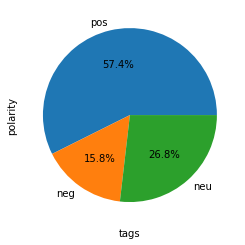

In [134]:
# sentiment analysis of overall tweets of a person.
from textblob import TextBlob
import matplotlib.pyplot as plt
pos,neg,neu = 0,0,0

for tweets in list_of_sentences:
    analysis = TextBlob(tweets)
    # print(analysis.sentiment)
    if analysis.sentiment.polarity>0:
        # print('positive')
        pos +=1
    elif analysis.sentiment.polarity==0:
        # print('neural')
        neu +=1
    elif analysis.sentiment.polarity<0:
        # print('negetive')
        neg +=1

plt.xlabel("tags")
plt.ylabel('polarity')
plt.pie([pos,neg,neu],labels=['pos','neg','neu'],autopct="%1.1f%%")
plt.show()

In [135]:
# convert to words
words = [w for sentence in list_of_sentences for w in sentence.split()]
# remove except alphanumeric characters
lines = [re.sub(r'[^A-Za-z0-9]+','',x) for x in words]
# remove empty strings
lines2 = [x for x in lines if x!='']

In [136]:
# removing stop words
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

stem = [s_stemmer.stem(word) for word in lines2]
stem2 = [word for word in stem if word not in nlp.Defaults.stop_words]

C:\Users\rabin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


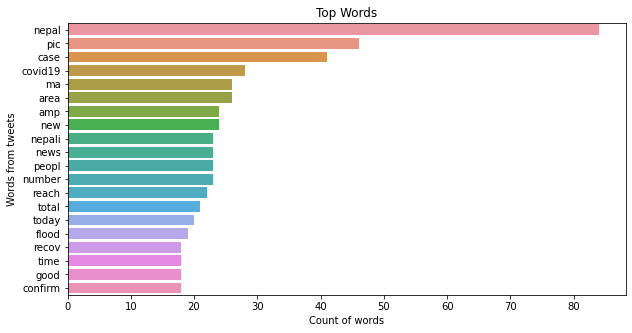

In [137]:
df2 = pd.DataFrame(stem2)
df2 = df2[0].value_counts()

df2 = df2[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df2.values,df2.index,alpha=1)
plt.title('Top Words')
plt.ylabel('Words from tweets')
plt.xlabel('Count of words')
plt.show()

In [138]:
from nltk import word_tokenize, pos_tag
from gensim import matutils, models
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse
# topic modeling of all tweets of a person.
def noun_print(df):
    # Let's create a function to pull out nouns from a string of text
    def nouns(text):
        '''Given a string of text, tokenize the text and pull out only the nouns.'''
        is_noun = lambda pos: pos[:2] == 'NN'
        tokenized = word_tokenize(text)
        all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
        return ' '.join(all_nouns)

    data_nouns = pd.DataFrame(df.tweets.apply(nouns))

    # Re-add the additional stop words since we are recreating the document-term matrix
    add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                    'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','ah']
    stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

    # Recreate a document-term matrix with only nouns
    cvn = CountVectorizer(stop_words=stop_words)
    data_cvn = cvn.fit_transform(data_nouns.tweets)
    data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
    data_dtmn.index = data_nouns.index

    # Create the gensim corpus
    corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

    # Create the vocabulary dictionary
    id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

    # Create the gensim corpus
    corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

    # Create the vocabulary dictionary
    id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

    # Let's start with 2 topics
    ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)

    # Let's try topics = 3
    ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)

    # Let's try 4 topics
    ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)

    # Our final LDA model (for now)
    ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=80)

    topics = []
    topic = ldan.print_topics()
    for top1 in topic:
        for top2 in top1[1].split(' + '):
            topics.append(top2[7:-1])
    topics = list(set(topics))
    print('top_topics:',topics)

noun_print(df)


top_topics: ['today', 'police', 'area', 'number', 'icc', 'water', 'morning', 'ma', 'https', 'nepali', 'world', 'ko', 'pic', 'melamchi', 'photo', 'river', 'nepal', 'peace', 'level', 'flood', 'days', 'covid', 'cases', 'news', 'alert', 'goodnight', '19', 'case', 'new', 'amp', 'dose']
